<a href="https://colab.research.google.com/github/pdesai27/DAB-103/blob/main/IndustryMigration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Industry Migration

### Import packages

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and exploring data

In [2]:
# Load country migration data
df = pd.read_csv("https://raw.githubusercontent.com/pdesai27/DAB-103/main/Data/CSV_%20Industry%20Migration.csv")

In [3]:
# Use head to display first five rows
df.head(5)

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,8.20,68.51,49.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,112.98,149.57,182.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,596.48,409.18,407.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,5,Computer Networking,401.46,447.39,163.99,236.69,188.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,6,Internet,1840.33,1368.42,877.71,852.39,519.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Use tail to display last five rows
df.tail(5)

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
5290,zw,Zimbabwe,Low income,Sub-Saharan Africa,B,Mining and quarrying,56,Mining & Metals,257.36,187.70,-17.45,70.60,-18.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5291,zw,Zimbabwe,Low income,Sub-Saharan Africa,P,Education,68,Higher Education,190.84,50.76,-68.74,-234.59,-304.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5292,zw,Zimbabwe,Low income,Sub-Saharan Africa,O,Public administration and defence; compulsory ...,74,International Affairs,25.23,-46.12,214.29,311.03,-55.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5293,zw,Zimbabwe,Low income,Sub-Saharan Africa,J,Information and communication,96,Information Technology & Services,46.65,35.93,-142.64,-108.16,-213.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5294,zw,Zimbabwe,Low income,Sub-Saharan Africa,S,Other service activities,100,Non-Profit Organization Management,133.56,88.48,6.96,-39.32,-92.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the missing values
df.isnull().sum()

country_code             0
country_name             0
wb_income                0
wb_region                0
isic_section_index       0
isic_section_name        0
industry_id              0
industry_name            0
net_per_10K_2015         0
net_per_10K_2016         0
net_per_10K_2017         0
net_per_10K_2018         0
net_per_10K_2019         0
Unnamed: 13           5295
Unnamed: 14           5295
Unnamed: 15           5295
Unnamed: 16           5295
Unnamed: 17           5295
Unnamed: 18           5295
Unnamed: 19           5295
Unnamed: 20           5295
Unnamed: 21           5295
Unnamed: 22           5295
Unnamed: 23           5295
Unnamed: 24           5295
Unnamed: 25           5295
Unnamed: 26           5295
Unnamed: 27           5295
Unnamed: 28           5295
Unnamed: 29           5295
dtype: int64

In [6]:
# Checking the shape of data
df.shape

(5295, 30)

In [7]:
# Checking the data types
df.dtypes

country_code           object
country_name           object
wb_income              object
wb_region              object
isic_section_index     object
isic_section_name      object
industry_id             int64
industry_name          object
net_per_10K_2015      float64
net_per_10K_2016      float64
net_per_10K_2017      float64
net_per_10K_2018      float64
net_per_10K_2019      float64
Unnamed: 13           float64
Unnamed: 14           float64
Unnamed: 15           float64
Unnamed: 16           float64
Unnamed: 17           float64
Unnamed: 18           float64
Unnamed: 19           float64
Unnamed: 20           float64
Unnamed: 21           float64
Unnamed: 22           float64
Unnamed: 23           float64
Unnamed: 24           float64
Unnamed: 25           float64
Unnamed: 26           float64
Unnamed: 27           float64
Unnamed: 28           float64
Unnamed: 29           float64
dtype: object

In [8]:
# Extract column names
df.columns

Index(['country_code', 'country_name', 'wb_income', 'wb_region',
       'isic_section_index', 'isic_section_name', 'industry_id',
       'industry_name', 'net_per_10K_2015', 'net_per_10K_2016',
       'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29'],
      dtype='object')

### Cleaning dataset

In [9]:
# Select columns 1 to 13 and drop empty columns (14 to 30).
data = df.iloc[:,0:13]

# Use head to display first ten rows
data.head(5)

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,8.20,68.51,49.55
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,112.98,149.57,182.22
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,596.48,409.18,407.41
3,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,5,Computer Networking,401.46,447.39,163.99,236.69,188.07
4,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,6,Internet,1840.33,1368.42,877.71,852.39,519.40


In [10]:
# Use tail to display last ten rows
data.tail(5)

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
5290,zw,Zimbabwe,Low income,Sub-Saharan Africa,B,Mining and quarrying,56,Mining & Metals,257.36,187.70,-17.45,70.60,-18.30
5291,zw,Zimbabwe,Low income,Sub-Saharan Africa,P,Education,68,Higher Education,190.84,50.76,-68.74,-234.59,-304.36
5292,zw,Zimbabwe,Low income,Sub-Saharan Africa,O,Public administration and defence; compulsory ...,74,International Affairs,25.23,-46.12,214.29,311.03,-55.88
5293,zw,Zimbabwe,Low income,Sub-Saharan Africa,J,Information and communication,96,Information Technology & Services,46.65,35.93,-142.64,-108.16,-213.82
5294,zw,Zimbabwe,Low income,Sub-Saharan Africa,S,Other service activities,100,Non-Profit Organization Management,133.56,88.48,6.96,-39.32,-92.51


In [11]:
# Checking the shape of data
data.shape

(5295, 13)

In [12]:
# Checking the missing values
data.isnull().sum()

country_code          0
country_name          0
wb_income             0
wb_region             0
isic_section_index    0
isic_section_name     0
industry_id           0
industry_name         0
net_per_10K_2015      0
net_per_10K_2016      0
net_per_10K_2017      0
net_per_10K_2018      0
net_per_10K_2019      0
dtype: int64

In [13]:
# Check unique values
data.nunique()

country_code           137
country_name           137
wb_income                4
wb_region                7
isic_section_index      19
isic_section_name       19
industry_id            143
industry_name          143
net_per_10K_2015      4951
net_per_10K_2016      4957
net_per_10K_2017      4954
net_per_10K_2018      4938
net_per_10K_2019      4950
dtype: int64

### Preliminary visualization

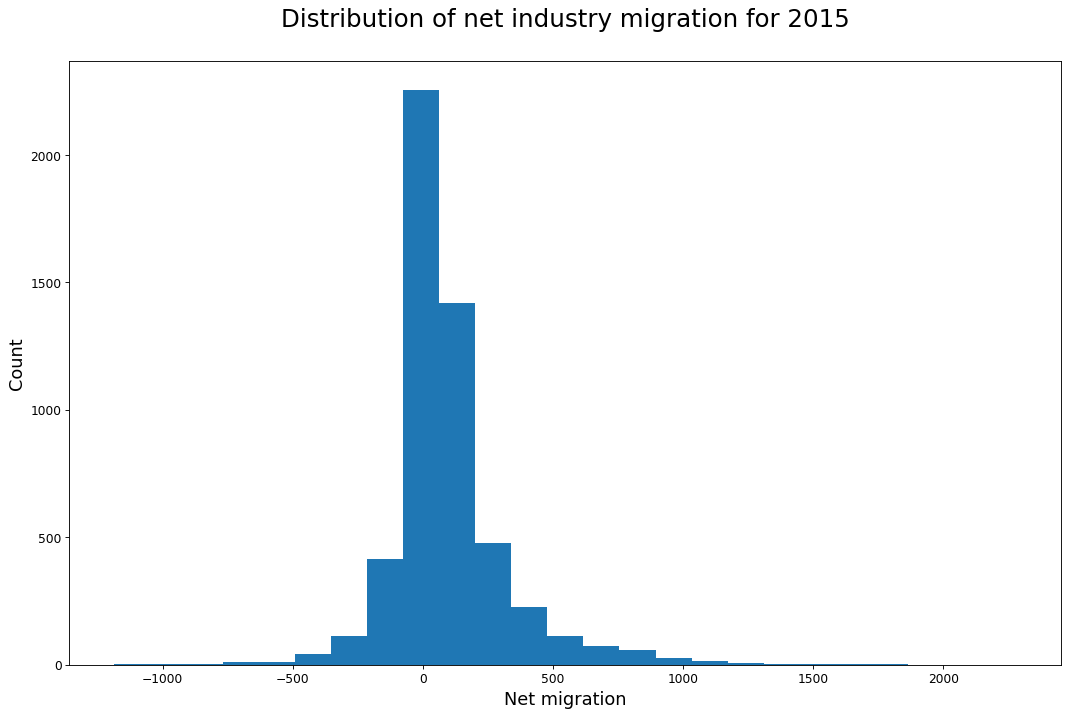

In [14]:
# Distribution of net industry migration for 2015
plt.figure(figsize=(16,10), dpi= 80)
plt.hist(x='net_per_10K_2015', data=data, bins=25)

# Decoration
plt.title('Distribution of net industry migration for 2015\n', fontsize=22)
plt.xlabel('Net migration', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)
plt.show()

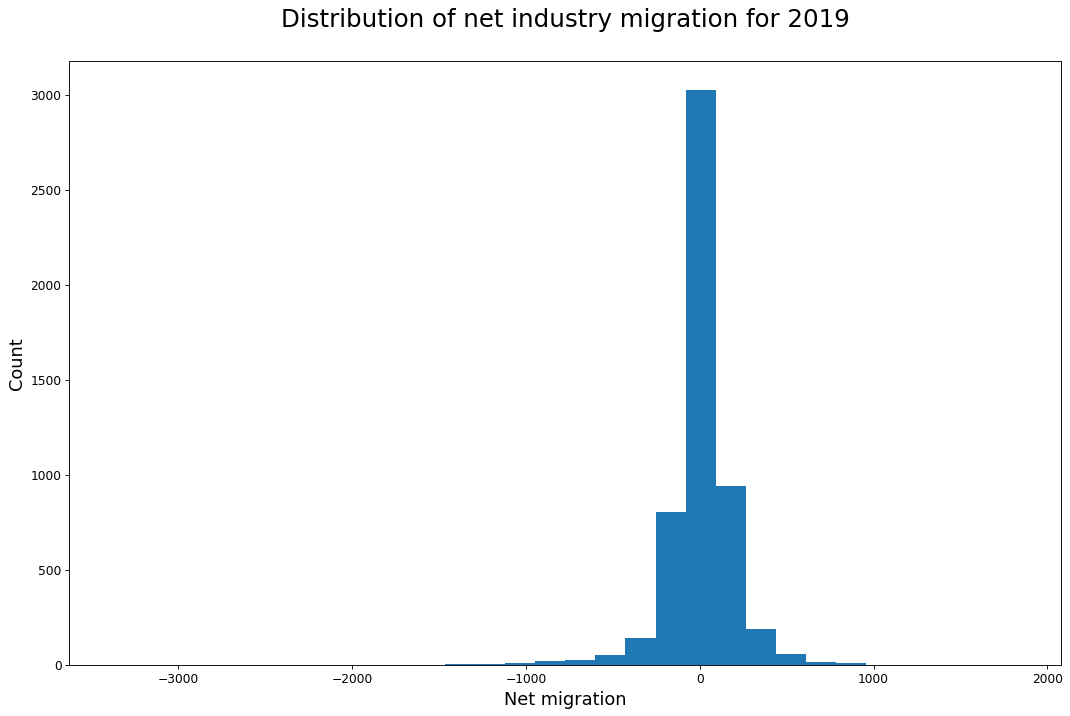

In [15]:
# Distribution of net industry migration for 2015
plt.figure(figsize=(16,10), dpi= 80)
plt.hist(x='net_per_10K_2019', data=data, bins=30)

# Decoration
plt.title('Distribution of net industry migration for 2019\n', fontsize=22)
plt.xlabel('Net migration', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)
plt.show()

In [16]:
# Most popular industries for the given time period (2015-2019)
top_indust = data['industry_name'].value_counts()
top_indust

Information Technology & Services    118
Higher Education                     114
Telecommunications                   104
Oil & Energy                         100
Banking                              100
                                    ... 
Fundraising                            4
Libraries                              1
Warehousing                            1
Legislative Office                     1
Nanotechnology                         1
Name: industry_name, Length: 143, dtype: int64

In [17]:
# Filtering dataset for popular industries
x = data[(data['industry_name'] == 'Information Technology & Services') | (data['industry_name'] == 'Higher Education') | (data['industry_name'] == 'Telecommunications') | (data['industry_name'] == 'Oil & Energy') | (data['industry_name'] == 'Banking')].sort_values(by = 'industry_name', ascending=True)
x

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
2113,ge,Georgia,Lower middle income,Europe & Central Asia,K,Financial and insurance activities,41,Banking,25.43,30.86,-29.46,29.76,5.86
4675,sy,Syrian Arab Republic,Low income,Middle East & North Africa,K,Financial and insurance activities,41,Banking,-614.99,-748.27,-505.96,-322.01,-193.48
1693,es,Spain,High income,Europe & Central Asia,K,Financial and insurance activities,41,Banking,-10.30,22.75,29.44,38.08,53.82
1805,fi,Finland,High income,Europe & Central Asia,K,Financial and insurance activities,41,Banking,2.33,13.75,11.81,3.07,64.16
1877,fr,France,High income,Europe & Central Asia,K,Financial and insurance activities,41,Banking,-55.81,-35.39,11.93,7.60,5.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,iq,Iraq,Upper middle income,Middle East & North Africa,J,Information and communication,8,Telecommunications,23.68,-148.03,-157.05,-87.85,-38.84
2670,ir,"Iran, Islamic Rep.",Upper middle income,Middle East & North Africa,J,Information and communication,8,Telecommunications,46.43,48.27,-55.54,-137.65,-274.17
4323,rs,Serbia,Upper middle income,Europe & Central Asia,J,Information and communication,8,Telecommunications,-7.67,-53.89,-62.38,-98.13,-77.85
2820,jm,Jamaica,Upper middle income,Latin America & Caribbean,J,Information and communication,8,Telecommunications,-72.75,-59.25,-285.81,-118.68,-184.21


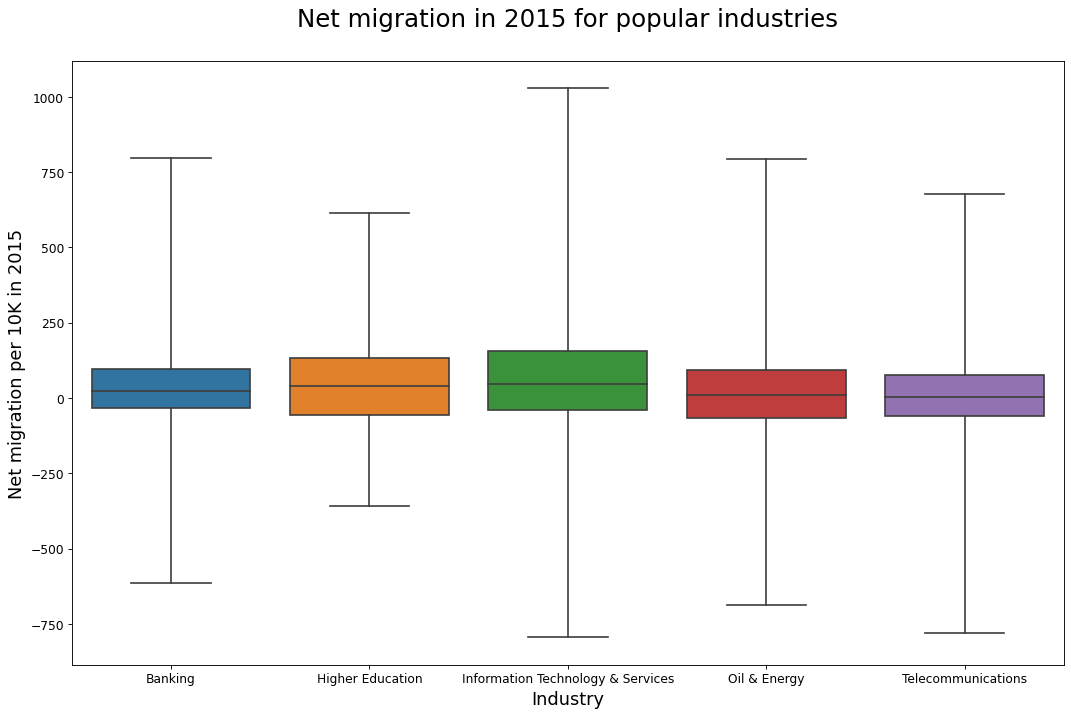

In [18]:
# Distribution of net migration in 2015 for top five popular industries
plt.figure(figsize=(16,10), dpi= 80)
sns.boxplot(x = 'industry_name', y = 'net_per_10K_2015', data = x, whis=10)

# Decoration
plt.title('Net migration in 2015 for popular industries\n', fontsize = 22)
plt.xlabel('Industry', fontsize = 16)
plt.ylabel('Net migration per 10K in 2015', fontsize = 16)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)
plt.show()

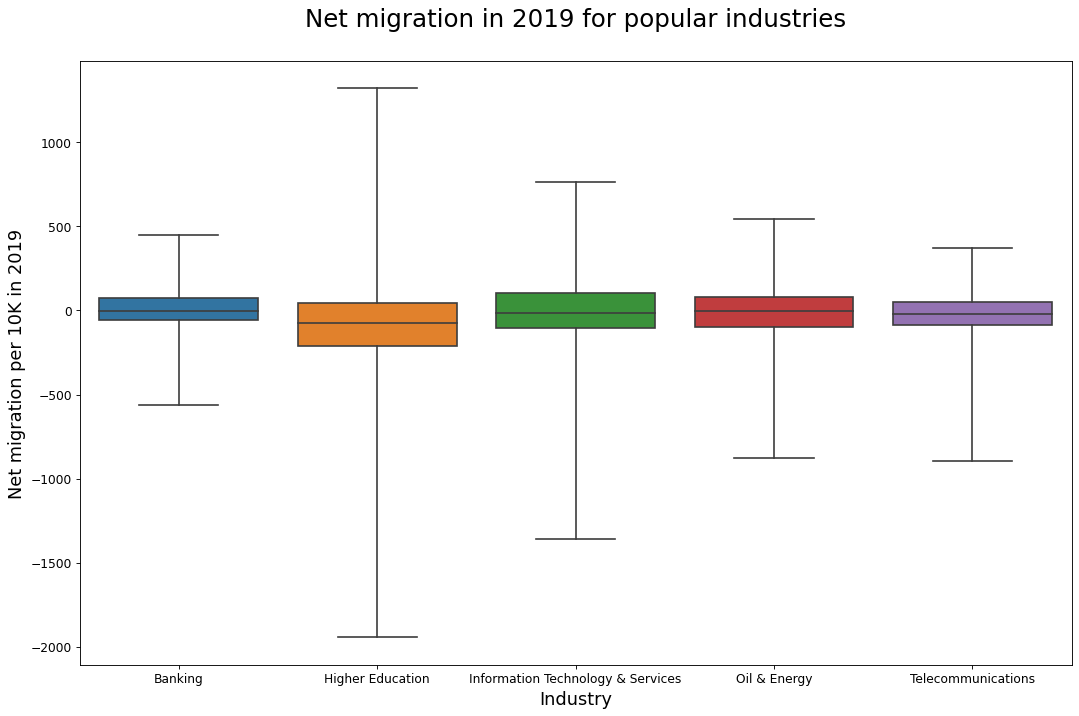

In [20]:
# Distribution of net migration in 2019 for top five popular industries in 2019 
plt.figure(figsize=(16,10), dpi= 80)
sns.boxplot(x = 'industry_name', y = 'net_per_10K_2019', data = x, whis=10)

# Decoration
plt.title('Net migration in 2019 for popular industries\n', fontsize = 22)
plt.xlabel('Industry', fontsize = 16)
plt.ylabel('Net migration per 10K in 2019', fontsize = 16)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)
plt.show()